This is a notebook created for the Ames Iowa Housing Data.

I hope to show of my knowlage of not only cleaning but also my ablity to dig into the data and extract the infomtion to perform some Exploratory Data Analysis and ml models to make predictions.

Lets start off with unziping the file and our initial inspection.

# Imports

In [1]:
# Standard imports
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',82)
pd.set_option('display.max_rows', None)

# Unzip files

zip_file_path = 'data/archive (4).zip'
extract_folder = 'data/'
# Create 'Data' folder if it dose not exist
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_path,'r')as zip_ref:
    zip_ref.extractall(extract_folder)

# Data Exploration
- From the zip folder we have:
    - Housing csv
    - Target csv
    - Test csv
    - Train csv
- Load Housing data
    - info()
    - head()
    - shape
      - (2930,82)

In [2]:
# Loading data
fpath = 'data/AmesHousing.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

In [3]:
df.shape

(2930, 82)

- Seting column names to lower case

In [4]:
df.columns = df.columns.str.lower()
df.head()

order        pid  ms subclass ms zoning  lot frontage  lot area street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  alley lot shape land contour utilities lot config land slope neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  condition 1 condition 2 bldg type house style  overall qual  overall cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   year built  year remod/add roof style roof matl exterior 1st exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  mas vnr type  mas vnr area exter qual exter cond foundation bsmt qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  bsmt cond bsmt exposure bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   bsmtfin sf 2  bsmt unf sf  total bsmt sf heating heating qc central air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  electrical  1st flr sf  2nd flr sf  low qual fin sf  gr liv area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

# Droping columns
- Not sure about value meaning in columns.  In real situation would have conversation with share holder for clarification
    - garage yr blt omited because could not find a value for no garage, other columns will show for no garage

In [5]:
df.drop(columns=['order','ms zoning', 'utilities', 'condition 1', 'condition 2','misc feature','misc val','garage yr blt'],inplace=True)
df.columns

Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'street', 'alley',
       'lot shape', 'land contour', 'lot config', 'land slope', 'neighborhood',
       'bldg type', 'house style', 'overall qual', 'overall cond',
       'year built', 'year remod/add', 'roof style', 'roof matl',
       'exterior 1st', 'exterior 2nd', 'mas vnr type', 'mas vnr area',
       'exter qual', 'exter cond', 'foundation', 'bsmt qual', 'bsmt cond',
       'bsmt exposure', 'bsmtfin type 1', 'bsmtfin sf 1', 'bsmtfin type 2',
       'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf', 'heating', 'heating qc',
       'central air', 'electrical', '1st flr sf', '2nd flr sf',
       'low qual fin sf', 'gr liv area', 'bsmt full bath', 'bsmt half bath',
       'full bath', 'half bath', 'bedroom abvgr', 'kitchen abvgr',
       'kitchen qual', 'totrms abvgrd', 'functional', 'fireplaces',
       'fireplace qu', 'garage type', 'garage finish', 'garage cars',
       'garage area', 'garage qual', 'garage cond', 'paved driv

# Numeric columns

In [6]:
num_col = df.select_dtypes('number').columns
num_col

Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'bsmtfin sf 1', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsmt full bath', 'bsmt half bath', 'full bath', 'half bath',
       'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd', 'fireplaces',
       'garage cars', 'garage area', 'wood deck sf', 'open porch sf',
       'enclosed porch', '3ssn porch', 'screen porch', 'pool area', 'mo sold',
       'yr sold', 'saleprice'],
      dtype='object')

In [7]:
df.describe()

pid  ms subclass  lot frontage       lot area  overall qual  \
count  2.930000e+03  2930.000000   2440.000000    2930.000000   2930.000000   
mean   7.144645e+08    57.387372     69.224590   10147.921843      6.094881   
std    1.887308e+08    42.638025     23.365335    7880.017759      1.411026   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7440.250000      5.000000   
50%    5.354536e+08    50.000000     68.000000    9436.500000      6.000000   
75%    9.071811e+08    70.000000     80.000000   11555.250000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       overall cond   year built  year remod/add  mas vnr area  bsmtfin sf 1  \
count   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   
mean       5.563140  1971.356314     1984.266553    101.896801    442.629566   
std        1.111537    30.245361       20.860286    179.112611    455.590839   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    370.000000   
75%        6.000000  2001.000000     2004.000000    164.000000    734.000000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       bsmtfin sf 2  bsmt unf sf  total bsmt sf   1st flr sf   2nd flr sf  \
count   2929.000000  2929.000000    2929.000000  2930.000000  2930.000000   
mean      49.722431   559.262547    1051.614544  1159.557679   335.455973   
std      169.168476   439.494153     440.615067   391.890885   428.395715   
min        0.000000     0.000000       0.000000   334.000000     0.000000   
25%        0.000000   219.000000     793.000000   876.250000     0.000000   
50%        0.000000   466.000000     990.000000  1084.000000     0.000000   
75%        0.000000   802.000000    1302.000000  1384.000000   703.750000   
max     1526.000000  2336.000000    6110.000000  5095.000000  2065.000000   

       low qual fin sf  gr liv area  bsmt full bath  bsmt half bath  \
count      2930.000000  2930.000000     2928.000000     2928.000000   
mean          4.676792  1499.690444        0.431352        0.061134   
std          46.310510   505.508887        0.524820        0.245254   
min           0.000000   334.000000        0.000000        0.000000   
25%           0.000000  1126.000000        0.000000        0.000000   
50%           0.000000  1442.000000        0.000000        0.000000   
75%           0.000000  1742.750000        1.000000        0.000000   
max        1064.000000  5642.000000        3.000000        2.000000   

         full bath    half bath  bedroom abvgr  kitchen abvgr  totrms abvgrd  \
count  2930.000000  2930.000000    2930.000000    2930.000000    2930.000000   
mean      1.566553     0.379522       2.854266       1.044369       6.443003   
std       0.552941     0.502629       0.827731       0.214076       1.572964   
min       0.000000     0.000000       0.000000       0.000000       2.000000   
25%       1.000000     0.000000       2.000000       1.000000       5.000000   
50%       2.000000     0.000000       3.000000       1.000000       6.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.000000   
max       4.000000     2.000000       8.000000       3.000000      15.000000   

        fireplaces  garage cars  garage area  wood deck sf  open porch sf  \
count  2930.000000  2929.000000  2929.000000   2930.000000    2930.000000   
mean      0.599317     1.766815   472.819734     93.751877      47.533447   
std       0.647921     0.760566   215.046549    126.361562      67.483400   
min       0.000000     0.000000     0.000000      0.000000       0.000000   
25%       0.000000     1.000000   320.000000      0.000000       0.000000   
50%       1.000000     2.000000   480.000000      0.000000      27

- Looks like they used 0 to indicate 'none'
    - Will leave it as 0
    - Will impute NaN as 0 also
- Sale price has outlier, $755,000 max price when the average is 150,000

# Saleprice
- Let look at the saleprice outliers

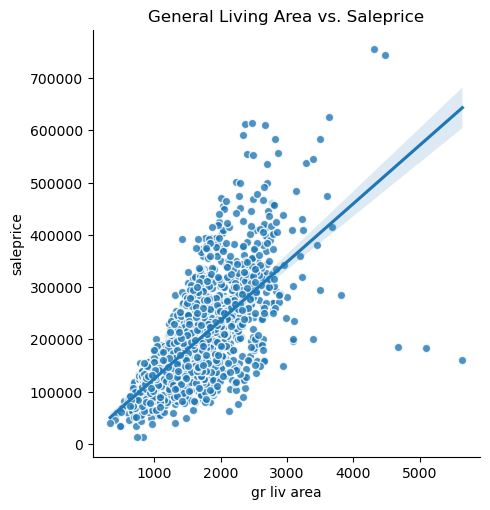

In [8]:
#sns.regplot(x='lot area',y='saleprice',data=df);
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="gr liv area", y="saleprice",
               scatter_kws=scatter_kws);
g.ax.set_title("General Living Area vs. Saleprice");

- We have two groups of outliers
    - Both above 4000 sqf in gr liv area
- Lets look at these houses

In [9]:
# Using filter to look at houses with more than 4000 sqf
df[df['gr liv area']>4000]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1498  908154235           60         313.0     63887   Pave   NaN       IR3   
1760  528320050           60         160.0     15623   Pave   NaN       IR1   
1767  528351010           60         104.0     21535   Pave   NaN       IR1   
2180  908154195           20         128.0     39290   Pave   NaN       IR1   
2181  908154205           60         130.0     40094   Pave   NaN       IR1   

     land contour lot config land slope neighborhood bldg type house style  \
1498          Bnk     Corner        Gtl      Edwards      1Fam      2Story   
1760          Lvl     Corner        Gtl      NoRidge      1Fam      2Story   
1767          Lvl     Corner        Gtl      NoRidge      1Fam      2Story   
2180          Bnk     Inside        Gtl      Edwards      1Fam      1Story   
2181          Bnk     Inside        Gtl      Edwards      1Fam      2Story   

      overall qual  overall cond  year built  year remod/add roof style  \
1498            10             5        2008            2008        Hip   
1760            10             5        1996            1996        Hip   
1767            10             6        1994            1995      Gable   
2180            10             5        2008            2009        Hip   
2181            10             5        2007            2008        Hip   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
1498   ClyTile       Stucco       Stucco        Stone         796.0   
1760   CompShg      Wd Sdng      ImStucc         None           0.0   
1767   WdShngl      HdBoard      HdBoard      BrkFace        1170.0   
2180   CompShg      CemntBd      CmentBd        Stone        1224.0   
2181   CompShg      CemntBd      CmentBd        Stone         762.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
1498         Ex         TA      PConc        Ex        TA            Gd   
1760         Gd         TA      PConc        Ex        TA            Av   
1767         Ex         TA      PConc        Ex        TA            Gd   
2180         Ex         TA      PConc        Ex        TA            Gd   
2181         Ex         TA      PConc        Ex        TA            Gd   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
1498            GLQ        5644.0            Unf           0.0        466.0   
1760            GLQ        2096.0            Unf           0.0        300.0   
1767            GLQ        1455.0            Unf           0.0        989.0   
2180            GLQ        4010.0            Unf           0.0       1085.0   
2181            GLQ        2260.0            Unf           0.0        878.0   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
1498         6110.0    GasA         Ex           Y      SBrkr        4692   
1760         2396.0    GasA         Ex           Y      SBrkr        2411   
1767         2444.0    GasA         Ex           Y      SBrkr        2444   
2180         5095.0    GasA         Ex           Y      SBrkr        5095   
2181         3138.0    GasA         Ex           Y      SBrkr        3138   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
1498         950                0         5642             2.0   
1760        2065                0         4476             1.0   
1767        1872                0         4316             0.0   
2180           0                0         5095             1.0   
2181        1538                0         4676             1.0   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
1498             0.0          2          1              3              1   
1760             0.0          3          1              4              1   
1767             1.0          3          1              4              1   
2180             1.0          2          1              2              1   
2181             0.0    

- The two house with the high prices look to be just priced high.  
    - They both have more than 4000 sqf of living area
    - 10 in overall quality
    - 2 Story
- The other three with have large sqf but low saleprice but have a 'Partial' sale condition
- They could be just priced to sell
- We will leave them 

# Missing Values
- We need a list of string columns and the value counts
    - We will use a for loop to get the value counts
- Then use isnull() to get a list of NaN in our dataset to compair with our value counts

In [10]:
str_col = df.select_dtypes('object')
str_col.columns

Index(['street', 'alley', 'lot shape', 'land contour', 'lot config',
       'land slope', 'neighborhood', 'bldg type', 'house style', 'roof style',
       'roof matl', 'exterior 1st', 'exterior 2nd', 'mas vnr type',
       'exter qual', 'exter cond', 'foundation', 'bsmt qual', 'bsmt cond',
       'bsmt exposure', 'bsmtfin type 1', 'bsmtfin type 2', 'heating',
       'heating qc', 'central air', 'electrical', 'kitchen qual', 'functional',
       'fireplace qu', 'garage type', 'garage finish', 'garage qual',
       'garage cond', 'paved drive', 'pool qc', 'fence', 'sale type',
       'sale condition'],
      dtype='object')

In [11]:
for col in str_col:
    print(f'Value counts for {col}')
    print(df[col].value_counts(dropna=False))
    print("\n")

Value counts for street
Pave    2918
Grvl      12
Name: street, dtype: int64


Value counts for alley
NaN     2732
Grvl     120
Pave      78
Name: alley, dtype: int64


Value counts for lot shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: lot shape, dtype: int64


Value counts for land contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: land contour, dtype: int64


Value counts for lot config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: lot config, dtype: int64


Value counts for land slope
Gtl    2789
Mod     125
Sev      16
Name: land slope, dtype: int64


Value counts for neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     2

In [12]:
null= df.isnull().sum().sort_values(ascending=False)
null.head(26)

pool qc           2917
alley             2732
fence             2358
fireplace qu      1422
lot frontage       490
garage cond        159
garage finish      159
garage qual        159
garage type        157
bsmt exposure       83
bsmtfin type 2      81
bsmtfin type 1      80
bsmt cond           80
bsmt qual           80
mas vnr type        23
mas vnr area        23
bsmt full bath       2
bsmt half bath       2
total bsmt sf        1
garage cars          1
electrical           1
bsmtfin sf 1         1
garage area          1
bsmtfin sf 2         1
bsmt unf sf          1
paved drive          0
dtype: int64

## lot frontage
- Lets look at the columns

In [13]:
# Changing Nan to 0 
df['lot frontage'] = df['lot frontage'].replace({np.nan:0})
df['lot frontage'].isna().sum()

0

## garage cars

In [14]:
df[df['garage cars'].isnull()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
2236  910201180           70          50.0      9060   Pave   NaN       Reg   

     land contour lot config land slope neighborhood bldg type house style  \
2236          Lvl     Inside        Gtl       IDOTRR      1Fam      2Story   

      overall qual  overall cond  year built  year remod/add roof style  \
2236             5             6        1923            1999      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
2236   CompShg      Wd Sdng      Plywood         None           0.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
2236         TA         TA     BrkTil        Gd        TA            No   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
2236            ALQ         548.0            Unf           0.0        311.0   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
2236          859.0    GasA         Ex           Y      SBrkr         942   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
2236         886                0         1828             0.0   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
2236             0.0          2          0              3              1   

     kitchen qual  totrms abvgrd functional  fireplaces fireplace qu  \
2236           Gd              6        Typ           0          NaN   

     garage type garage finish  garage cars  garage area garage qual  \
2236      Detchd           NaN          NaN          NaN         NaN   

     garage cond paved drive  wood deck sf  open porch sf  enclosed porch  \
2236         NaN           Y           174              0             212   

      3ssn porch  screen porch  pool area pool qc  fence  mo sold  yr sold  \
2236           0             0          0     NaN  MnPrv        3     2007   

     sale type sale condition  saleprice  
2236       WD          Alloca     150909

In [15]:
# Detached garge, no info on other garage columns, will drop column
df.drop(2236, inplace=True)
df['garage cars'].isna().sum()

0

## electrical

In [16]:
df[df['electrical'].isnull()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1577  916386080           80          73.0      9735   Pave   NaN       Reg   

     land contour lot config land slope neighborhood bldg type house style  \
1577          Lvl     Inside        Gtl       Timber      1Fam        SLvl   

      overall qual  overall cond  year built  year remod/add roof style  \
1577             5             5        2006            2007      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
1577   CompShg      VinylSd      VinylSd         None           0.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
1577         TA         TA      PConc        Gd        TA            No   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
1577            Unf           0.0            Unf           0.0        384.0   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
1577          384.0    GasA         Gd           Y        NaN         754   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
1577         640                0         1394             0.0   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
1577             0.0          2          1              3              1   

     kitchen qual  totrms abvgrd functional  fireplaces fireplace qu  \
1577           Gd              7        Typ           0          NaN   

     garage type garage finish  garage cars  garage area garage qual  \
1577     BuiltIn           Fin          2.0        400.0          TA   

     garage cond paved drive  wood deck sf  open porch sf  enclosed porch  \
1577          TA           Y           100              0               0   

      3ssn porch  screen porch  pool area pool qc fence  mo sold  yr sold  \
1577           0             0          0     NaN   NaN        5     2008   

     sale type sale condition  saleprice  
1577       WD          Normal     167500

In [17]:
# Will replace nan with SBrkr, the mode.  
df['electrical'].replace({np.nan:'SBrkr'},inplace=True)
df['electrical'].value_counts(dropna=False)

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: electrical, dtype: int64

## bsmt columns
### bsmtfin sf 2, bsmtfin sf 1, bsmt unf sf, total bsmt sf, bsmt half bath, bsmt full bath

In [18]:
df[df['bsmtfin sf 2'].isna()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1341  903230120           20          99.0      5940   Pave   NaN       IR1   

     land contour lot config land slope neighborhood bldg type house style  \
1341          Lvl        FR3        Gtl      BrkSide      1Fam      1Story   

      overall qual  overall cond  year built  year remod/add roof style  \
1341             4             7        1946            1950      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
1341   CompShg      MetalSd       CBlock         None           0.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
1341         TA         TA      PConc       NaN       NaN           NaN   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
1341            NaN           NaN            NaN           NaN          NaN   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
1341            NaN    GasA         TA           Y      FuseA         896   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
1341           0                0          896             NaN   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
1341             NaN          1          0              2              1   

     kitchen qual  totrms abvgrd functional  fireplaces fireplace qu  \
1341           TA              4        Typ           0          NaN   

     garage type garage finish  garage cars  garage area garage qual  \
1341      Detchd           Unf          1.0        280.0          TA   

     garage cond paved drive  wood deck sf  open porch sf  enclosed porch  \
1341          TA           Y             0              0               0   

      3ssn porch  screen porch  pool area pool qc  fence  mo sold  yr sold  \
1341           0             0          0     NaN  MnPrv        4     2008   

     sale type sale condition  saleprice  
1341     ConLD        Abnorml      79000

In [19]:
# Nan was used instead of 0 for this row for basm mucerical columns
df['bsmtfin sf 2'] = df['bsmtfin sf 2'].replace({np.nan:0})
df[df['bsmtfin sf 1'].isna()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1341  903230120           20          99.0      5940   Pave   NaN       IR1   

     land contour lot config land slope neighborhood bldg type house style  \
1341          Lvl        FR3        Gtl      BrkSide      1Fam      1Story   

      overall qual  overall cond  year built  year remod/add roof style  \
1341             4             7        1946            1950      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
1341   CompShg      MetalSd       CBlock         None           0.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
1341         TA         TA      PConc       NaN       NaN           NaN   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
1341            NaN           NaN            NaN           0.0          NaN   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
1341            NaN    GasA         TA           Y      FuseA         896   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
1341           0                0          896             NaN   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
1341             NaN          1          0              2              1   

     kitchen qual  totrms abvgrd functional  fireplaces fireplace qu  \
1341           TA              4        Typ           0          NaN   

     garage type garage finish  garage cars  garage area garage qual  \
1341      Detchd           Unf          1.0        280.0          TA   

     garage cond paved drive  wood deck sf  open porch sf  enclosed porch  \
1341          TA           Y             0              0               0   

      3ssn porch  screen porch  pool area pool qc  fence  mo sold  yr sold  \
1341           0             0          0     NaN  MnPrv        4     2008   

     sale type sale condition  saleprice  
1341     ConLD        Abnorml      79000

In [20]:
df['bsmtfin sf 1'] = df['bsmtfin sf 1'].replace({np.nan:0})
df['bsmt unf sf'] = df['bsmt unf sf'].replace({np.nan:0})
df['total bsmt sf'] = df['total bsmt sf'].replace({np.nan:0})
df[df['bsmt half bath'].isna()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1341  903230120           20          99.0      5940   Pave   NaN       IR1   
1497  908154080           20         123.0     47007   Pave   NaN       IR1   

     land contour lot config land slope neighborhood bldg type house style  \
1341          Lvl        FR3        Gtl      BrkSide      1Fam      1Story   
1497          Lvl     Inside        Gtl      Edwards      1Fam      1Story   

      overall qual  overall cond  year built  year remod/add roof style  \
1341             4             7        1946            1950      Gable   
1497             5             7        1959            1996      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type  mas vnr area  \
1341   CompShg      MetalSd       CBlock         None           0.0   
1497   CompShg      Plywood      Plywood         None           0.0   

     exter qual exter cond foundation bsmt qual bsmt cond bsmt exposure  \
1341         TA         TA      PConc       NaN       NaN           NaN   
1497         TA         TA       Slab       NaN       NaN           NaN   

     bsmtfin type 1  bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  \
1341            NaN           0.0            NaN           0.0          0.0   
1497            NaN           0.0            NaN           0.0          0.0   

      total bsmt sf heating heating qc central air electrical  1st flr sf  \
1341            0.0    GasA         TA           Y      FuseA         896   
1497            0.0    GasA         TA           Y      SBrkr        3820   

      2nd flr sf  low qual fin sf  gr liv area  bsmt full bath  \
1341           0                0          896             NaN   
1497           0                0         3820             NaN   

      bsmt half bath  full bath  half bath  bedroom abvgr  kitchen abvgr  \
1341             NaN          1          0              2              1   
1497             NaN          3          1              5              1   

     kitchen qual  totrms abvgrd functional  fireplaces fireplace qu  \
1341           TA              4        Typ           0          NaN   
1497           Ex             11        Typ           2           Gd   

     garage type garage finish  garage cars  garage area garage qual  \
1341      Detchd           Unf          1.0        280.0          TA   
1497      Attchd           Unf          2.0        624.0          TA   

     garage cond paved drive  wood deck sf  open porch sf  enclosed porch  \
1341          TA           Y             0              0               0   
1497          TA           Y             0            372               0   

      3ssn porch  screen porch  pool area pool qc  fence  mo sold  yr sold  \
1341           0             0          0     NaN  MnPrv        4     2008   
1497           0             0          0     NaN    NaN        7     2008   

     sale type sale condition  saleprice  
1341     ConLD        Abnorml      79000  
1497       WD          Normal     284700

In [21]:
df['bsmt half bath'] = df['bsmt half bath'].replace({np.nan:0})
df['bsmt full bath'] = df['bsmt full bath'].replace({np.nan:0})
df['bsmt full bath'].isna().sum()

0

## mas vnr area, mas vnr type

In [22]:
df['mas vnr area'] = df['mas vnr area'].replace({np.nan:"None"})
df['mas vnr type'] = df['mas vnr type'].replace({np.nan:0})
df['mas vnr area'].isna().sum()

0

In [23]:
df.isnull().sum().sort_values(ascending=False)

pool qc            2916
alley              2731
fence              2358
fireplace qu       1421
garage qual         158
garage cond         158
garage finish       158
garage type         157
bsmt exposure        83
bsmtfin type 2       81
bsmtfin type 1       80
bsmt cond            80
bsmt qual            80
full bath             0
bsmt half bath        0
half bath             0
bedroom abvgr         0
functional            0
kitchen qual          0
bsmt full bath        0
gr liv area           0
totrms abvgrd         0
kitchen abvgr         0
pid                   0
fireplaces            0
2nd flr sf            0
garage cars           0
garage area           0
paved drive           0
wood deck sf          0
open porch sf         0
enclosed porch        0
3ssn porch            0
screen porch          0
pool area             0
mo sold               0
yr sold               0
sale type             0
sale condition        0
low qual fin sf       0
central air           0
1st flr sf      

- We will address the rest using a Simple imputer

# Object column

- The rest of the nan looks to be object columns, when the house dose not have that particular feature
    - Will replace with "None" for object columns in pipeline
- Paved drive way has y,n and p as value.   p should be y
- bsmt exposure has 83 Nan other bsmt feature have 80, will take a look

In [24]:
df['paved drive'] = df['paved drive'].replace({'P':"Y"})
df['paved drive'].value_counts()

Y    2713
N     216
Name: paved drive, dtype: int64

In [25]:
# Wondering why 'bsmt exposure' has 3 more nan valuse then the other bsmt columns 
df[(df['bsmt exposure'].isna()) & df['bsmt cond'].notna()]

pid  ms subclass  lot frontage  lot area street alley lot shape  \
66    528445060           20          73.0      8987   Pave   NaN       Reg   
1796  528458090           60          81.0     10411   Pave   NaN       Reg   
2779  907194130           60          65.0     14006   Pave   NaN       IR1   

     land contour lot config land slope neighborhood bldg type house style  \
66            Lvl     Inside        Gtl      Somerst      1Fam      1Story   
1796          Lvl     Corner        Gtl      Somerst      1Fam      2Story   
2779          Lvl     Inside        Gtl      CollgCr      1Fam      2Story   

      overall qual  overall cond  year built  year remod/add roof style  \
66               8             5        2005            2006      Gable   
1796             5             5        2007            2007      Gable   
2779             7             5        2002            2002      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type mas vnr area exter qual  \
66     CompShg      VinylSd      VinylSd      BrkFace        226.0         Gd   
1796   CompShg      VinylSd      VinylSd         None          0.0         Gd   
2779   CompShg      VinylSd      VinylSd      BrkFace        144.0         Gd   

     exter cond foundation bsmt qual bsmt cond bsmt exposure bsmtfin type 1  \
66           TA      PConc        Gd        TA           NaN            Unf   
1796         TA     CBlock        Gd        TA           NaN            Unf   
2779         TA      PConc        Gd        TA           NaN            Unf   

      bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  total bsmt sf  \
66             0.0            Unf           0.0       1595.0         1595.0   
1796           0.0            Unf           0.0        725.0          725.0   
2779           0.0            Unf           0.0        936.0          936.0   

     heating heating qc central air electrical  1st flr sf  2nd flr sf  \
66      GasA         Ex           Y      SBrkr        1595           0   
1796    GasA         Ex           Y      SBrkr         725         863   
2779    GasA         Ex           Y      SBrkr         936         840   

      low qual fin sf  gr liv area  bsmt full bath  bsmt half bath  full bath  \
66                  0         1595             0.0             0.0          2   
1796                0         1588             0.0             0.0          3   
2779                0         1776             0.0             0.0          2   

      half bath  bedroom abvgr  kitchen abvgr kitchen qual  totrms abvgrd  \
66            0              2              1           Gd              6   
1796          0              3              1           Gd              8   
2779          1              3              1           Gd              7   

     functional  fireplaces fireplace qu garage type garage finish  \
66          Typ           1           Gd      Attchd           RFn   
1796        Typ           0          NaN      Attchd           Unf   
2779        Typ           1           TA      Attchd           RFn   

      garage cars  garage area garage qual garage cond paved drive  \
66            3.0        880.0          TA          TA           Y   
1796          2.0        561.0          TA          TA           Y   
2779          2.0        474.0          TA          TA           Y   

      wood deck sf  open porch sf  enclosed porch  3ssn porch  screen porch  \
66             144              0               0           0             0   
1796             0              0               0           0             0   
2779           144             96               0           0             0   

      pool area pool qc fence  mo sold  yr sold sale type sale condition  \
66            0     NaN   NaN        5     2010       WD          Normal   
1796          0     NaN   NaN        7     2007       New        Partial   
2779          0     NaN   NaN        2     2006       WD          Normal   

      s

In [26]:
# Look like the nan were incorectly inputed. Will change to No. 
df['bsmt exposure'] = df['bsmt exposure'].replace({np.nan:'No'})
df['bsmt exposure'].isna().sum()

0

# New Imports

In [27]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

# TTS

In [28]:
X = df.drop(columns='saleprice')
y = df['saleprice']
# TTS
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [29]:
ord_col = ['street','alley','land slope','exter qual','exter cond', 'bsmt qual','bsmt cond','bsmt exposure','heating qc', 'central air',
           'kitchen qual','fireplace qu','garage finish','garage qual','garage cond','paved drive','pool qc']

In [32]:
ohe_col = str_col.drop(columns=ord_col)
ohe_col.head()

lot shape land contour lot config neighborhood bldg type house style  \
0       IR1          Lvl     Corner        NAmes      1Fam      1Story   
1       Reg          Lvl     Inside        NAmes      1Fam      1Story   
2       IR1          Lvl     Corner        NAmes      1Fam      1Story   
3       Reg          Lvl     Corner        NAmes      1Fam      1Story   
4       IR1          Lvl     Inside      Gilbert      1Fam      2Story   

  roof style roof matl exterior 1st exterior 2nd mas vnr type foundation  \
0        Hip   CompShg      BrkFace      Plywood        Stone     CBlock   
1      Gable   CompShg      VinylSd      VinylSd         None     CBlock   
2        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace     CBlock   
3        Hip   CompShg      BrkFace      BrkFace         None     CBlock   
4      Gable   CompShg      VinylSd      VinylSd         None      PConc   

  bsmtfin type 1 bsmtfin type 2 heating electrical functional garage type  \
0            BLQ            Unf    GasA      SBrkr        Typ      Attchd   
1            Rec            LwQ    GasA      SBrkr        Typ      Attchd   
2            ALQ            Unf    GasA      SBrkr        Typ      Attchd   
3            ALQ            Unf    GasA      SBrkr        Typ      Attchd   
4            GLQ            Unf    GasA      SBrkr        Typ      Attchd   

   fence sale type sale condition  
0    NaN       WD          Normal  
1  MnPrv       WD          Normal  
2    NaN       WD          Normal  
3    NaN       WD          Normal  
4  MnPrv       WD          Normal

# Pipelines

## Ordinal

In [33]:
#Imputer
impute_na_ord = SimpleImputer(strategy='constant',fill_value='NA')
# Specifi=ying order of categories for our Ordinal Cols
street_ord = ['Grvl','Pave']
slope_ord = ['Gtl','Mod','Sev']
qual_ord = ['NA','Po','Fa','TA','Gd','Ex']
exposure_ord = ['NA','Ma','Av','Gd']
air_ord = ['N','Y']
g_finish = ['NA','Unf','Fin','RFn']
paved_ord = ['N','Y']
# Making the list of order list for Ordinal Encoder
ordinal_cat_orders = [street_ord, slope_ord, qual_ord, qual_ord, qual_ord, qual_ord,
                      exposure_ord, qual_ord, air_ord, qual_ord, qual_ord, g_finish,
                     qual_ord, qual_ord, paved_ord, qual_ord,]
ord_encoder = OrdinalEncoder(categories=ordinal_cat_orders)
# Scaler
scaler_ord = MinMaxScaler()
#Pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
#Tuple
ord_tuple = ('ordinal', ord_pipe, ord_col)

## Categorical

In [34]:
# Imputer
impute_na = SimpleImputer(strategy='constant',fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Pipe
ohe_pipe = make_pipeline(impute_na,ohe_encoder)
# Tuple
ohe_tuple = ('categorical', ohe_pipe,ohe_col)

## Numerical

In [35]:
num_cols = X_train.select_dtypes('number').columns
# Scaler.
impute_num = SimpleImputer(strategy='constant', fill_value=0)
scaler = MinMaxScaler()
# Pipe
num_pipe = make_pipeline(impute_num,scaler)
# Tuple
num_tuple = ('numeric',num_pipe,num_cols)

In [36]:
preprocessor = ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],
                                verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'bsmtfin sf 1',
       'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf', '1st flr sf',
       '2nd flr sf', 'low qual fin...
2909    NaN       WD          Normal  
2910  GdPrv       WD          Normal  
2911    NaN       WD          Normal  
2912    NaN       WD          Normal  
2913    NaN       WD          Normal  
2914    NaN       WD          Normal  
2915    NaN       WD          Normal  
2916    NaN       WD         Abnorml  
2917    NaN       WD         Abnorml  
2918  GdPrv       WD          Normal  
2919    NaN       WD          Normal  
2920    NaN       WD         Abnorml  
2921    NaN       WD          Normal  
2922    NaN       WD          Family  
2923    NaN       WD          Normal  
2924    NaN       WD         Abnorml  
2925  GdPrv       WD          Normal  
2926  MnPrv       WD          Normal  
2927  MnPrv       WD          Normal  
2928    NaN       WD          Normal  
2929    NaN       WD          Normal  )],
                  verbose_feature_names_out=False)

In [39]:
X_train.head()

pid  ms subclass  lot frontage  lot area street alley lot shape  \
1588  923202005           90          97.0      8940   Pave   NaN       IR1   
781   905229040           50           0.0     11250   Pave   NaN       Reg   
1110  528427010           20          92.0     11932   Pave   NaN       Reg   
819   906340110           20          79.0     10637   Pave   NaN       Reg   
620   534477110           50          80.0      9600   Pave   NaN       Reg   

     land contour lot config land slope neighborhood bldg type house style  \
1588          Lvl     Corner        Gtl      Mitchel    Duplex      SFoyer   
781           Lvl     Inside        Gtl      ClearCr      1Fam      1.5Fin   
1110          Lvl        FR2        Gtl      Somerst      1Fam      1Story   
819           Lvl     Inside        Gtl      CollgCr      1Fam      1Story   
620           Lvl     Inside        Gtl        NAmes      1Fam      1.5Fin   

      overall qual  overall cond  year built  year remod/add roof style  \
1588             7             5        1997            1998      Gable   
781              4             5        1957            1989      Gable   
1110             8             5        2007            2008      Gable   
819              8             5        2007            2008        Hip   
620              6             8        1950            2005      Gable   

     roof matl exterior 1st exterior 2nd mas vnr type mas vnr area exter qual  \
1588   CompShg      VinylSd      VinylSd      BrkFace        200.0         TA   
781    CompShg      Wd Sdng      Wd Sdng         None          0.0         TA   
1110   CompShg      VinylSd      VinylSd        Stone        186.0         Gd   
819    CompShg      VinylSd      VinylSd        Stone        336.0         Gd   
620    CompShg      VinylSd      VinylSd         None          0.0         TA   

     exter cond foundation bsmt qual bsmt cond bsmt exposure bsmtfin type 1  \
1588         Gd      PConc        Gd        Gd            Gd            GLQ   
781          TA     CBlock        TA        TA            Av            Unf   
1110         TA      PConc        Gd        TA            No            Unf   
819          TA      PConc        Ex        TA            Gd            GLQ   
620          Gd     CBlock        TA        TA            No            BLQ   

      bsmtfin sf 1 bsmtfin type 2  bsmtfin sf 2  bsmt unf sf  total bsmt sf  \
1588        1309.0            Unf           0.0         35.0         1344.0   
781            0.0            Unf           0.0       1104.0         1104.0   
1110           0.0            Unf           0.0       1580.0         1580.0   
819         1288.0            Unf           0.0        417.0         1705.0   
620          120.0            Unf           0.0        736.0          856.0   

     heating heating qc central air electrical  1st flr sf  2nd flr sf  \
1588    GasA         Ex           Y      SBrkr        1344           0   
781     GasA         Ex           Y      FuseA        1104         684   
1110    GasA         Ex           Y      SBrkr        1580           0   
819     GasA         Ex           Y      SBrkr        1718           0   
620     GasA         Ex           Y      SBrkr        1112         556   

      low qual fin sf  gr liv area  bsmt full bath  bsmt half bath  full bath  \
1588                0         1344             2.0             0.0          2   
781                 0         1788             1.0             0.0          1   
1110                0         1580             0.0             0.0          2   
819                 0         1718             1.0             0.0          2   
620                 0         1668             0.0             0.0          1   

      half bath  bedroom abvgr  kitchen abvgr kitchen qual  totrms abvgrd  \
1588          0              2              2           TA              8   
781           0              5              1           TA              8   
1110          0  

In [37]:
num_cols

Index(['pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'bsmtfin sf 1',
       'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf', '1st flr sf',
       '2nd flr sf', 'low qual fin sf', 'gr liv area', 'bsmt full bath',
       'bsmt half bath', 'full bath', 'half bath', 'bedroom abvgr',
       'kitchen abvgr', 'totrms abvgrd', 'fireplaces', 'garage cars',
       'garage area', 'wood deck sf', 'open porch sf', 'enclosed porch',
       '3ssn porch', 'screen porch', 'pool area', 'mo sold', 'yr sold'],
      dtype='object')

In [40]:
ohe_col

lot shape land contour lot config neighborhood bldg type house style  \
0          IR1          Lvl     Corner        NAmes      1Fam      1Story   
1          Reg          Lvl     Inside        NAmes      1Fam      1Story   
2          IR1          Lvl     Corner        NAmes      1Fam      1Story   
3          Reg          Lvl     Corner        NAmes      1Fam      1Story   
4          IR1          Lvl     Inside      Gilbert      1Fam      2Story   
5          IR1          Lvl     Inside      Gilbert      1Fam      2Story   
6          Reg          Lvl     Inside      StoneBr    TwnhsE      1Story   
7          IR1          HLS     Inside      StoneBr    TwnhsE      1Story   
8          IR1          Lvl     Inside      StoneBr    TwnhsE      1Story   
9          Reg          Lvl     Inside      Gilbert      1Fam      2Story   
10         IR1          Lvl     Corner      Gilbert      1Fam      2Story   
11         IR1          Lvl     Inside      Gilbert      1Fam      1Story   
12         IR1          Lvl     Inside      Gilbert      1Fam      2Story   
13         Reg          Lvl     Inside      Gilbert      1Fam      1Story   
14         IR1          Lvl     Corner      StoneBr    TwnhsE      1Story   
15         IR2          HLS    CulDSac      StoneBr      1Fam      2Story   
16         IR1          Bnk     Inside      Gilbert      1Fam      1.5Fin   
17         Reg          Lvl     Corner      StoneBr      1Fam      1Story   
18         Reg          Lvl     Corner      Gilbert      1Fam      1Story   
19         Reg          Lvl     Inside       NWAmes      1Fam      1Story   
20         IR1          Lvl     Inside       NWAmes      1Fam      1Story   
21         Reg          Lvl     Inside       NWAmes      1Fam      SFoyer   
22         Reg          Lvl     Inside      Somerst      1Fam      2Story   
23         IR1          Lvl    CulDSac        NAmes      1Fam      1Story   
24         IR1          Lvl    CulDSac        NAmes      1Fam      1Story   
25         Reg          Lvl     Inside        NAmes      1Fam      1Story   
26         Reg          Lvl     Corner        NAmes      1Fam      1Story   
27         Reg          Lvl        FR2        NAmes      1Fam      1Story   
28         IR1          Lvl        FR2        NAmes    TwnhsE      1Story   
29         Reg          Lvl     Inside       BrDale     Twnhs      2Story   
30         Reg          Lvl     Inside       BrDale     Twnhs      2Story   
31         Reg          Lvl     Inside       BrDale     Twnhs      2Story   
32         Reg          Lvl     Inside      NPkVill    TwnhsE      1Story   
33         Reg          Lvl        FR2      NPkVill     Twnhs      2Story   
34         Reg          Lvl        FR2      NPkVill     Twnhs      1Story   
35         Reg          Lvl     Inside      NPkVill     Twnhs      2Story   
36         IR1          Lvl     Inside      NridgHt      1Fam      2Story   
37         Reg          Lvl     Inside      NridgHt      1Fam      1Story   
38         IR1          Lvl     Inside      NridgHt      1Fam      1Story   
39         IR1          Lvl     Corner      NridgHt      1Fam      1Story   
40         Reg          Lvl     Corner      NridgHt      1Fam      1Story   
41         Reg          Lvl     Inside      NridgHt      1Fam      1Story   
42         IR1          Lvl     Inside      NridgHt      1Fam      1Story   
43         IR1          Lvl     Inside      NridgHt      1Fam      1Story   
44         IR1          Lvl     Inside      NridgHt      1Fam      1Story   
45         IR1          Lvl     Inside      NridgHt    TwnhsE      1Story   
46         Reg          HLS     Inside      NridgHt      1Fam      1Story   
47         Reg          Lvl     Corner      NridgHt      1Fam      2Story   
48         Reg          Lvl     Inside      NridgHt    TwnhsE      1Story   
49         IR1          Lvl     Inside      NridgHt    TwnhsE      1Story   
50         Reg          Lvl     Inside      NridgHt     Twnhs      2Story   
5

In [42]:
ord_col

['street',
 'alley',
 'land slope',
 'exter qual',
 'exter cond',
 'bsmt qual',
 'bsmt cond',
 'bsmt exposure',
 'heating qc',
 'central air',
 'kitchen qual',
 'fireplace qu',
 'garage finish',
 'garage qual',
 'garage cond',
 'paved drive',
 'pool qc']

In [38]:
X_train_tr = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
# Looing for top 25 features for saleprice
sorted_values = df.corr()['SalePrice'].sort_values(ascending=False)
top25 = sorted_values.head(25)
top25

In [ ]:
# Use . index to pull the column names out
top25.index

In [ ]:
# Use the column names to create new dataframe with the top 25 correlated columns
sorted_df = df[top25.index]
sorted_df.info()
sorted_df.head()

## Setting column name to lower case 

In [ ]:
# Setting the column names to lower case to ease of use
sorted_df.columns = sorted_df.columns.str.lower()
sorted_df.columns

## Want to look at the value counts for all string column
- Looking for the Categorcal columns vs Ordinal columns
- Will pull out the Numeric columns first

In [ ]:
num_col = sorted_df.select_dtypes('number').columns
num_col